In [1]:
import bnn
import numpy as np
import os

In [2]:
class loadDataset():
    def __init__(self,path):
        self.dir= path

    def load_images(self,filename):
        with open(os.path.join(self.dir,filename),'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=0)

        data=data.reshape(-1,3,32,32)
        return data

    def load_labels(self,filename):
        with open(os.path.join(self.dir,filename),'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=0)
        return labels

In [3]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW2A2,'aedes',bnn.RUNTIME_HW)

In [4]:
print(hw_classifier.classes)

['Bacia', 'Garrafa', 'Garrafao', 'Jarro', 'Pneu']


In [5]:
from PIL import Image

dataset=loadDataset(path='data')

images_set=dataset.load_images(filename='test-images.bin')
labels_set=dataset.load_labels(filename='test-labels.bin')

In [6]:
images_set=images_set.transpose([0,2,3,1])
images=[]
for i in range(images_set.shape[0]):
    im=Image.fromarray(images_set[i])
    images.append(im)

In [7]:
labels = hw_classifier.classify_images(images)

Inference took 143501.00 microseconds, 1195.84 usec per image
Classification rate: 836.23 images per second


In [8]:
labels=np.array(labels, dtype=np.uint8)
labels

array([2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3,
       4, 3, 1, 3, 3], dtype=uint8)

In [9]:
labels_set

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3], dtype=uint8)

In [10]:
print('Overall Accuracy: {0:.4f}%' .format(sum(labels_set==labels)/len(labels_set)))

Overall Accuracy: 0.8917%


In [11]:
pred=[]
pred.append(sum(labels[labels_set==0]==0)/sum(labels_set==0))
pred.append(sum(labels[labels_set==1]==1)/sum(labels_set==1))
pred.append(sum(labels[labels_set==2]==2)/sum(labels_set==2))
pred.append(sum(labels[labels_set==3]==3)/sum(labels_set==3))
pred.append(sum(labels[labels_set==4]==4)/sum(labels_set==4))
pred

[1.0, 1.0, 0.88, 0.59999999999999998, 1.0]

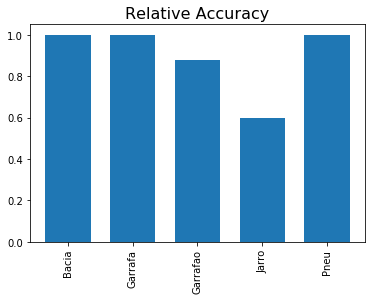

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_pos = np.arange(len(hw_classifier.classes))
fig, ax = plt.subplots()
ax.bar(x_pos,pred, 0.7)
ax.set_title('Relative Accuracy', fontsize=16)
ax.set_xticklabels(hw_classifier.classes, rotation='vertical')
ax.set_xticks(x_pos)
ax.set
plt.show()

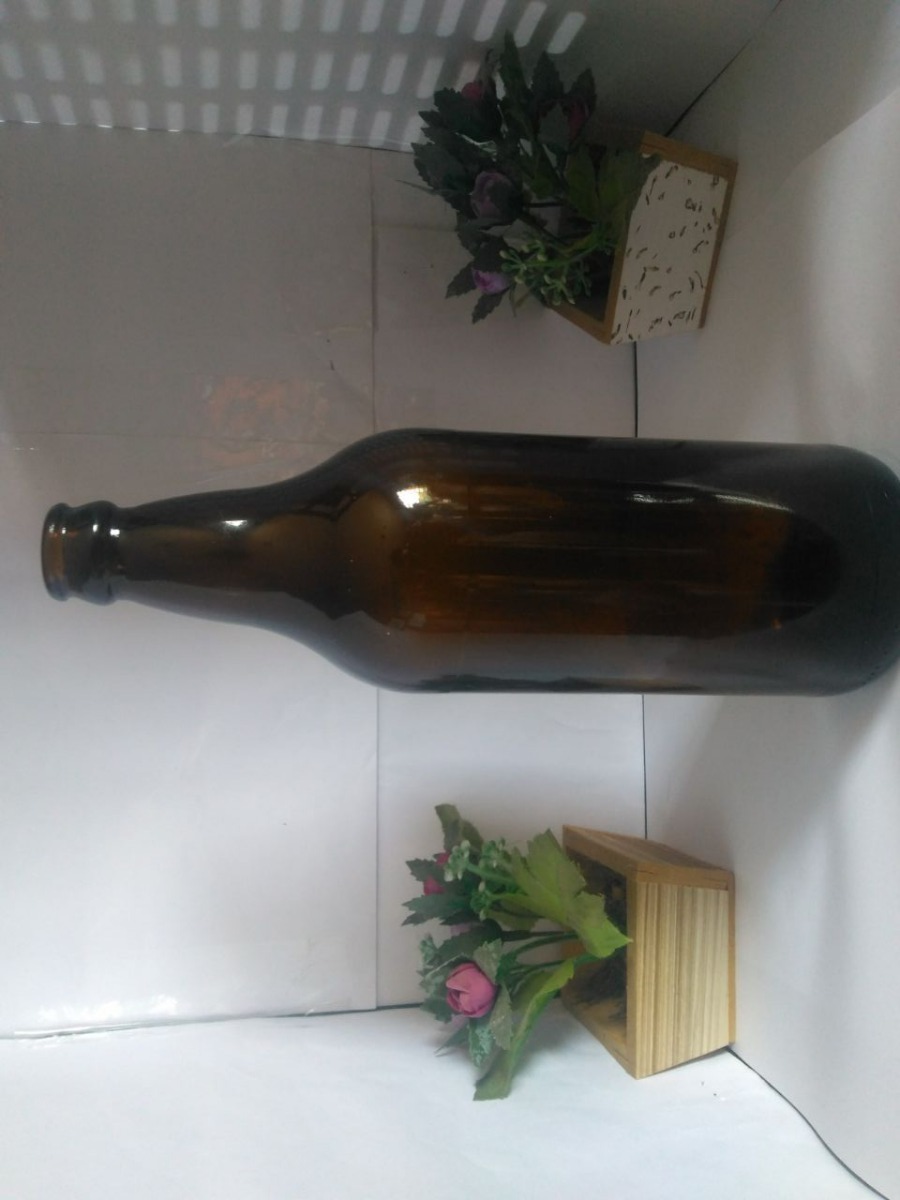

In [13]:
from PIL import Image
im=Image.open('data/garrafa.jpg')
im=im.transpose(Image.ROTATE_90)
im

In [14]:
rankingsW2A2 = hw_classifier.classify_image_details(im)
print("\n{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(rankingsW2A2)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],rankingsW2A2[i]))
print("\nClass number: {0}".format(np.argmax(rankingsW2A2)))
print("Class name: {0}".format(hw_classifier.class_name(np.argmax(rankingsW2A2))))

Inference took 4866.00 microseconds
Classification rate: 205.51 images per second

   [CLASS]    [RANKING]
     Bacia       -12
   Garrafa       161
  Garrafao       -20
     Jarro       -41
      Pneu       -29

Class number: 1
Class name: Garrafa


In [15]:
from pynq import Xlnk

xlnk = Xlnk()
xlnk.xlnk_reset()